# Song Recomender Model

### Notes:
1. numerical variables. (can do research and find which features are relevant for model)
2. scale
3. train k means (+pickle)

- create model

user input
- search for track id
- get audio features
- scale
- predict cluster
- recommend random song cluster

X
X-noid = X.drop("ID")

kmeans.labels
x["cluster"] = kmeans.labels



Tip. Go through whole process first and get quick and dirty model.



to train model only use numerical values
can potentially drop some numerical features to improve model(recommended) (research)


### Which feature to use
For a K-means model that recommends songs based on user input, focusing on Spotify audio features that capture the essence of a song's mood, energy, and danceability can be particularly effective. Consider these features:

Danceability: Reflects the suitability of a song for dancing, based on tempo, rhythm stability, beat strength, and overall regularity.
Energy: Measures intensity and activity, capturing the dynamic feel of a song.
Valence: Indicates the musical positiveness conveyed by a track, which can help in understanding the emotional context.
Tempo: The speed or pace of a song, which is fundamental in matching songs with a similar vibe.
Acousticness: Helps in distinguishing between acoustic and more electronic/synthetic music.
Instrumentalness: Useful for identifying songs with a focus on instrumentation, which might be preferred by users interested in instrumental tracks.
Liveness: Could be considered if the presence of live audience sounds or a "live" feel is important for similarity.
Speechiness: Can be useful to filter out tracks with more spoken words, distinguishing between music tracks and those with significant vocal content like podcasts or audiobooks.
These features collectively can capture the essence of what a user might enjoy in a song, beyond just genre or artist. By clustering songs using these features, your K-means model can identify and recommend songs that share similar characteristics with the user's input song, potentially leading to more personalized and satisfying recommendations.

Remember, the choice of features might require iteration; you might start with these and adjust based on the performance of your recommendation system and user feedback.

## To do
- increase number of clusters. approx 20'000 song so should have a lot of klusters

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Dataset preparation

In [2]:
song_database_df = pd.read_csv('../data/full_af.csv',index_col=0)
song_database_df = song_database_df.drop(columns = ["mode", "key", "duration_ms", "liveness"])

In [3]:
#getting only numeric features for model
song_database_numeric_noid_df = song_database_df.select_dtypes(include=['number'])

In [4]:
#getting df with numeric features plus id
song_database_numeric_id_df = pd.concat([song_database_df["id"],song_database_numeric_noid_df], axis = 1)

## Scaling features

In [5]:
X = song_database_numeric_noid_df
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature
0,0.382,0.451,-6.606,0.0293,0.5570,0.000034,0.506,150.803,4
1,0.742,0.375,-13.829,0.0482,0.3970,0.901000,0.105,102.023,4
2,0.585,0.552,-10.613,0.0353,0.1940,0.017100,0.496,100.089,4
3,0.405,0.535,-7.504,0.0531,0.0531,0.106000,0.637,97.698,4
4,0.586,0.526,-6.928,0.0564,0.5550,0.000000,0.456,107.153,4
...,...,...,...,...,...,...,...,...,...
19463,0.431,0.628,-6.259,0.0384,0.4030,0.000008,0.277,118.016,4
19464,0.486,0.640,-8.027,0.0551,0.1360,0.000076,0.289,122.017,4
19465,0.606,0.757,-6.206,0.0302,0.0157,0.000205,0.588,103.051,4
19466,0.455,0.621,-7.694,0.0517,0.6510,0.000003,0.280,119.043,4


In [29]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,cluster
0,-1.203368,-0.752130,0.553010,-0.478573,0.921310,-0.378979,-0.161329,1.086538,0.203084,1.126801
1,1.103717,-1.090953,-1.223366,-0.219739,0.380120,3.760926,-1.740688,-0.665150,0.203084,0.346767
2,0.097572,-0.301852,-0.432445,-0.396403,-0.306516,-0.300561,-0.200714,-0.734600,0.203084,-0.210400
3,-1.055970,-0.377642,0.332162,-0.152634,-0.783101,0.107931,0.354622,-0.820460,0.203084,-0.433267
4,0.103981,-0.417765,0.473819,-0.107441,0.914546,-0.379135,-0.358256,-0.480932,0.203084,-1.436168
...,...,...,...,...,...,...,...,...,...,...
19463,-0.889348,0.036971,0.638348,-0.353949,0.400415,-0.379098,-1.063257,-0.090842,0.203084,1.126801
19464,-0.536876,0.090469,0.203539,-0.125245,-0.502697,-0.378787,-1.015994,0.052834,0.203084,1.126801
19465,0.232152,0.612078,0.651383,-0.466247,-0.909605,-0.378193,0.161632,-0.628234,0.203084,1.572535
19466,-0.735542,0.005763,0.285434,-0.171807,1.239260,-0.379123,-1.051441,-0.053962,0.203084,-1.436168


## Clustering with K-Means

## Feature selection

## Investigating optimum number of clusters

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

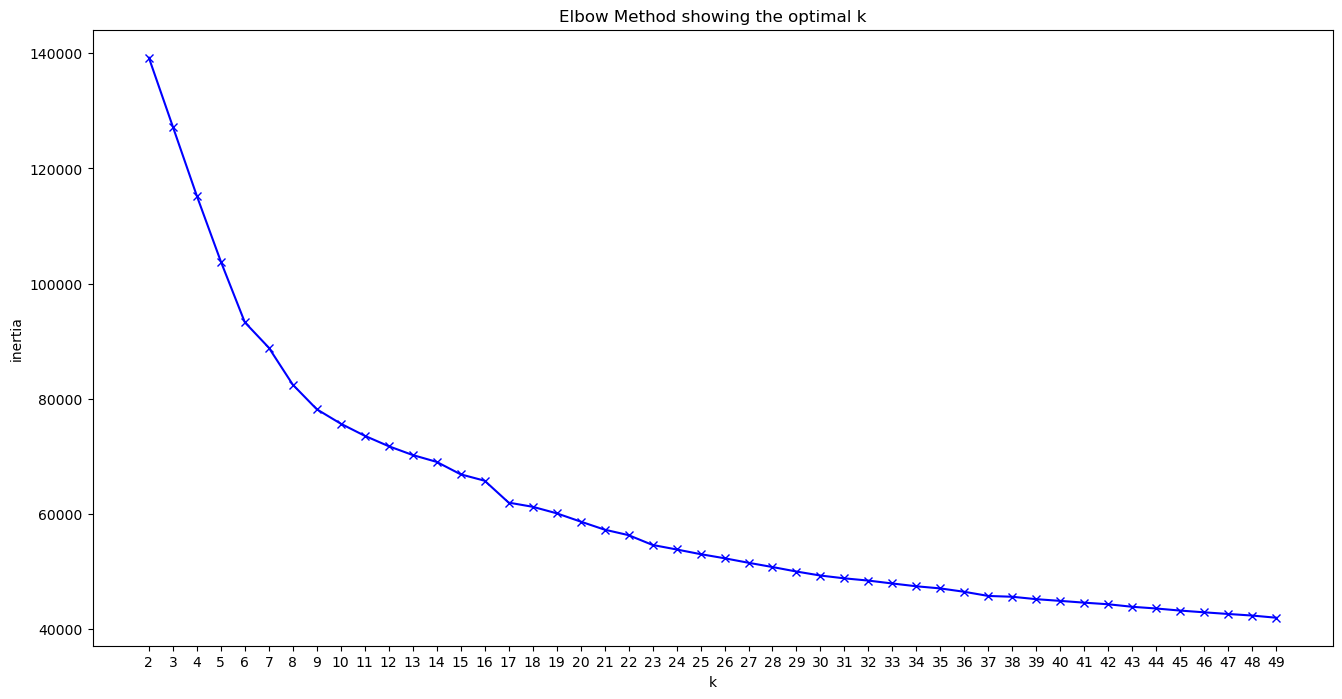

In [8]:
K = range(2, 50)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters = k,
                init="k-means++",
                n_init = "auto"
                max_iter= 50,
                algorithm="elkan",
                random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhouette

Training a K-Means model with 149 clusters! 

Training a K-Means model with 150 clusters! 

Training a K-Means model with 151 clusters! 

Training a K-Means model with 152 clusters! 

Training a K-Means model with 153 clusters! 

Training a K-Means model with 154 clusters! 

Training a K-Means model with 155 clusters! 

Training a K-Means model with 156 clusters! 

Training a K-Means model with 157 clusters! 

Training a K-Means model with 158 clusters! 

Training a K-Means model with 159 clusters! 

Training a K-Means model with 160 clusters! 

Training a K-Means model with 161 clusters! 

Training a K-Means model with 162 clusters! 

Training a K-Means model with 163 clusters! 

Training a K-Means model with 164 clusters! 

Training a K-Means model with 165 clusters! 

Training a K-Means model with 166 clusters! 

Training a K-Means model with 167 clusters! 

Training a K-Means model with 168 clusters! 

Training a K-Means model with 169 clusters! 

Training a K-Means model with 170 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

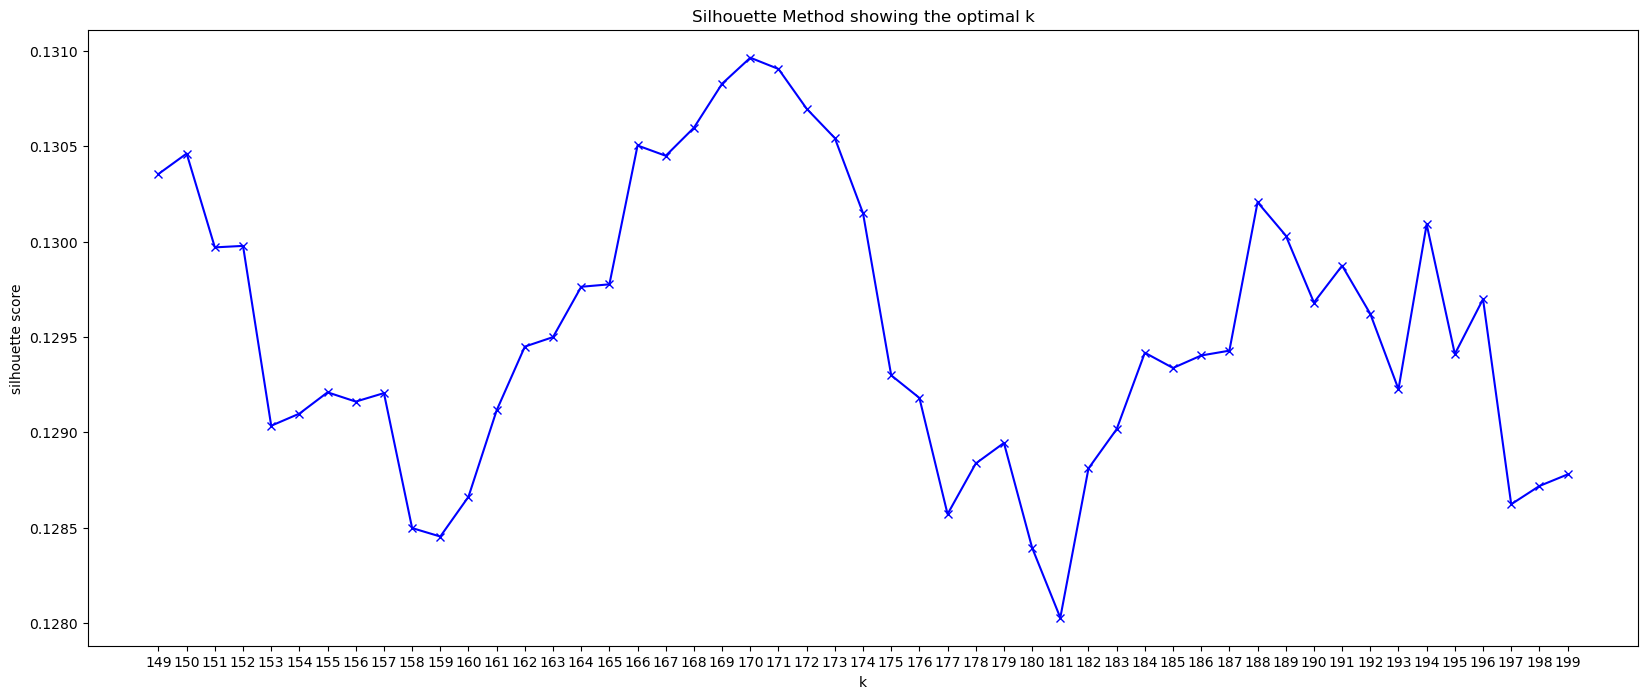

In [38]:
K = range(149, 200)
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    init="k-means++",
                    n_init = "auto",
                    max_iter= 50,
                    algorithm="elkan",
                    random_state=1234)
    
    kmeans.fit(X_scaled)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(20,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Kmeans model

In [34]:
kmeans = KMeans(n_clusters=150,
               init="k-means++",
               n_init = "auto",
               max_iter= 100,
               algorithm="elkan",
               random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

29551.69838589531


In [35]:
silhouette_score(X_scaled, kmeans.predict(X_scaled))

0.1302722129672559

### Cluster info

In [17]:
labels = kmeans.labels_
labels

array([24, 17, 12, ..., 28,  1, 19], dtype=int32)

In [18]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

In [20]:
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

0     1221
1      818
2      206
3      501
4      573
5     1330
6     1384
7      461
8      572
9      271
10     803
11      15
12     772
13     271
14     943
15     654
16     588
17     348
18     467
19    1141
20     496
21     802
22     497
23     612
24     892
25      87
26      34
27    1464
28    1122
29     123
Name: count, dtype: int64

## Adding clusters to dataset

In [21]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
song_database_numeric_id_df["cluster"] = clusters
song_database_numeric_id_df

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,cluster
0,6yzJiHzsscf0n88xb9aNT4,0.382,0.451,-6.606,0.0293,0.5570,0.000034,0.506,150.803,4,24
1,5zdXRoKLZ54VBdbdn7yhz4,0.742,0.375,-13.829,0.0482,0.3970,0.901000,0.105,102.023,4,17
2,5qvCKAyjgHnpR5c63OedCY,0.585,0.552,-10.613,0.0353,0.1940,0.017100,0.496,100.089,4,12
3,2vByA9JgfMU2bPjUqmxCdv,0.405,0.535,-7.504,0.0531,0.0531,0.106000,0.637,97.698,4,10
4,0pPQwIjwqduvLfZORYYEaI,0.586,0.526,-6.928,0.0564,0.5550,0.000000,0.456,107.153,4,1
...,...,...,...,...,...,...,...,...,...,...,...
19463,6RWCvgNCEqXuVZYnDTPDEh,0.431,0.628,-6.259,0.0384,0.4030,0.000008,0.277,118.016,4,24
19464,4oEf84vBYVftf6KmZexhVo,0.486,0.640,-8.027,0.0551,0.1360,0.000076,0.289,122.017,4,24
19465,0lbHiQaHPlp5gGtsUPtj6l,0.606,0.757,-6.206,0.0302,0.0157,0.000205,0.588,103.051,4,28
19466,4kjI1gwQZRKNDkw1nI475M,0.455,0.621,-7.694,0.0517,0.6510,0.000003,0.280,119.043,4,1


### Testing clusters by ear

In [22]:
from IPython.display import IFrame

def play_song(track_id):
    iframe = IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )
    display(iframe)

In [23]:
#find songs in same cluster
track = song_database_numeric_id_df[song_database_numeric_id_df["cluster"] == 5].sample()
track_id = track["id"].item()
play_song(track_id)

## Exporting models,scalers and dataframes

### Model and scaler

In [66]:
import pickle

def save(model, filename = "filename.pickle"):
    with open(filename, "wb") as f:
        pickle.dump(model, f)

In [24]:
with open("model/scaler1.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("model/kmeans_1.pickle", "wb") as f:
    pickle.dump(kmeans,f)
    


### Dataset


In [25]:
song_database_numeric_id_df.to_csv("../data/audio_features_db_df.csv")

In [26]:
song_database_numeric_id_df

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,time_signature,cluster
0,6yzJiHzsscf0n88xb9aNT4,0.382,0.451,-6.606,0.0293,0.5570,0.000034,0.506,150.803,4,24
1,5zdXRoKLZ54VBdbdn7yhz4,0.742,0.375,-13.829,0.0482,0.3970,0.901000,0.105,102.023,4,17
2,5qvCKAyjgHnpR5c63OedCY,0.585,0.552,-10.613,0.0353,0.1940,0.017100,0.496,100.089,4,12
3,2vByA9JgfMU2bPjUqmxCdv,0.405,0.535,-7.504,0.0531,0.0531,0.106000,0.637,97.698,4,10
4,0pPQwIjwqduvLfZORYYEaI,0.586,0.526,-6.928,0.0564,0.5550,0.000000,0.456,107.153,4,1
...,...,...,...,...,...,...,...,...,...,...,...
19463,6RWCvgNCEqXuVZYnDTPDEh,0.431,0.628,-6.259,0.0384,0.4030,0.000008,0.277,118.016,4,24
19464,4oEf84vBYVftf6KmZexhVo,0.486,0.640,-8.027,0.0551,0.1360,0.000076,0.289,122.017,4,24
19465,0lbHiQaHPlp5gGtsUPtj6l,0.606,0.757,-6.206,0.0302,0.0157,0.000205,0.588,103.051,4,28
19466,4kjI1gwQZRKNDkw1nI475M,0.455,0.621,-7.694,0.0517,0.6510,0.000003,0.280,119.043,4,1
